# Deep Learning - 3

## 3.6 IMDB Practical Part-1

In [1]:
# Listing 4.1 Loading the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
# shape of data
print("Shape of training data : ",train_data.shape)
print("Shape of training labels : ",train_labels.shape)
print("Shape of testing data : ",test_data.shape)
print("Shape of training labels : ",train_labels.shape)

Shape of training data :  (25000,)
Shape of training labels :  (25000,)
Shape of testing data :  (25000,)
Shape of training labels :  (25000,)


In [3]:
# samples of data
print("1st review from training data : ",train_data[0])
print("1st label from training data : ",train_labels[0])
print("1st review from testing data : ",test_data[0])
print("1st label from testing data : ",test_labels[0])


1st review from training data :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1st label from training dat

In [4]:
# find max value from sequence
print("Maximum number in any sequence : ",max([max(sequence) for sequence in train_data]))

Maximum number in any sequence :  9999


In [5]:
# Listing 4.2 Decoding reviews back to text
# load word index
word_index = imdb.get_word_index()
# reverse the dic so numbers come first and then word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# indices are offset by 3
# 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print("1st review from training data : ",decoded_review)

1st review from training data :  ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for 

In [2]:
# Listing 4.3 Encoding the integer sequences via multi-hot encoding
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [3]:
# vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
# samples of data
print("1st review from training data after vectorization : ",x_train[0])
print("1st label from training data after vectorization: ",y_train[0])
print("1st review from testing data after vectorization: ",x_test[0])
print("1st label from testing data after vectorization: ",y_test[0])

1st review from training data after vectorization :  [0. 1. 1. ... 0. 0. 0.]
1st label from training data after vectorization:  1.0
1st review from testing data after vectorization:  [0. 1. 1. ... 0. 0. 0.]
1st label from testing data after vectorization:  0.0


## 3.7 IMDB Practical Part-2

In [9]:
# Listing 4.4 Model definition
from tensorflow import keras 
from tensorflow.keras import layers
 
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

In [10]:
# isting 4.5 Compiling the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [4]:
# Listing 4.6 Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
#  Listing 4.7 Training your model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5368 - accuracy: 0.7882 - val_loss: 0.4194 - val_accuracy: 0.8436
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3225 - accuracy: 0.8952 - val_loss: 0.3121 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2340 - accuracy: 0.9235 - val_loss: 0.2815 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1836 - accuracy: 0.9401 - val_loss: 0.3116 - val_accuracy: 0.8740
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1503 - accuracy: 0.9521 - val_loss: 0.2825 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1261 - accuracy: 0.9613 - val_loss: 0.3125 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1024 - accuracy: 0.9695 - val_loss: 0.3105 - val_accuracy: 0.8827
Epoch 8/20
30

In [13]:
# check history object
print("History of model fitting : ")
history_dict = history.history
print(history_dict)
print("dictonary keys : ")
print(history_dict.keys())

History of model fitting : 
{'loss': [0.5368212461471558, 0.32247278094291687, 0.2340405136346817, 0.18363220989704132, 0.15032555162906647, 0.12610067427158356, 0.10235955566167831, 0.08585911989212036, 0.07194250822067261, 0.05861682444810867, 0.04916830360889435, 0.03873392567038536, 0.032270368188619614, 0.026231376454234123, 0.019800540059804916, 0.017280997708439827, 0.014368715696036816, 0.008346964605152607, 0.00918675772845745, 0.008237346075475216], 'accuracy': [0.7882000207901001, 0.8952000141143799, 0.9235333204269409, 0.9400666952133179, 0.9521333575248718, 0.9613333344459534, 0.9694666862487793, 0.975600004196167, 0.9798666834831238, 0.9841333627700806, 0.9869333505630493, 0.9919333457946777, 0.9937333464622498, 0.995199978351593, 0.9968000054359436, 0.9972666501998901, 0.9975333213806152, 0.9995333552360535, 0.9987999796867371, 0.9983999729156494], 'val_loss': [0.41944965720176697, 0.31210950016975403, 0.2814846336841583, 0.3115677237510681, 0.2825174629688263, 0.3124616

In [5]:
# Listing 4.8 Plotting the training and validation loss
import matplotlib.pyplot as plt
def plot_loss(historyDic):
  history_dict = historyDic.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)
  plt.clf()
  plt.plot(epochs, loss_values, "bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

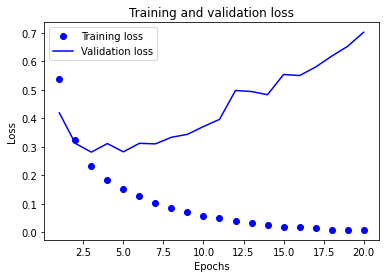

In [15]:
plot_loss(history)

In [6]:
# Listing 4.9 Plotting the training and validation accuracy
def plot_acc(historyDic):
  history_dict = historyDic.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)
  plt.clf()
  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

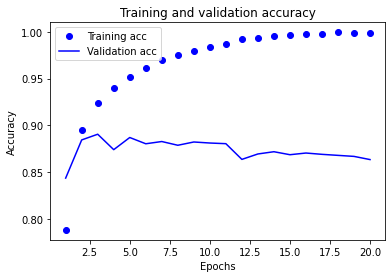

In [17]:
plot_acc(history)

In [18]:
# Listing 4.10 Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 1s 13ms/step - loss: 0.4564 - accuracy: 0.8157
Epoch 2/5
49/49 [==============================] - 1s 13ms/step - loss: 0.2583 - accuracy: 0.9106
Epoch 3/5
49/49 [==============================] - 1s 13ms/step - loss: 0.2007 - accuracy: 0.9300
Epoch 4/5
49/49 [==============================] - 1s 13ms/step - loss: 0.1682 - accuracy: 0.9406
Epoch 5/5
49/49 [==============================] - 1s 18ms/step - loss: 0.1432 - accuracy: 0.9502


In [19]:
# evaluate on test data
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3410 - accuracy: 0.8694


In [20]:
results

[0.3409577012062073, 0.8693600296974182]

- results in an accuracy of 88%